# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense

In [2]:
pd.options.display.max_columns = None

# Step1 : Loading Data

In [3]:
df = pd.read_csv('../datasets/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Step2: Checking for missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Analyzing and Manipulating Data 

In [5]:
df['CarCompany'] = [i.split(' ')[0] for i in df.CarName]

In [6]:
#Checking Company Names
df.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
# Found some errors in names so fixing it
df.CarCompany = df.CarCompany.str.lower()
df.CarCompany = df.CarCompany.str.replace('maxda','mazda')
df.CarCompany = df.CarCompany.str.replace('toyouta','toyota')
df.CarCompany = df.CarCompany.str.replace('volkswagen','vokswagen')
df.CarCompany = df.CarCompany.str.replace('vw','vokswagen')
df.drop(columns=['CarName'], index=1,inplace=True)


In [8]:
#Finding all non numeric columns
obj_columns = df.dtypes[df.dtypes == object].index.values

In [9]:
#Total Non Numeric Columns
len(obj_columns)

10

### In below Figure from 5000 to something like 7500 highest distribution is found which means most peoply bought car in this range

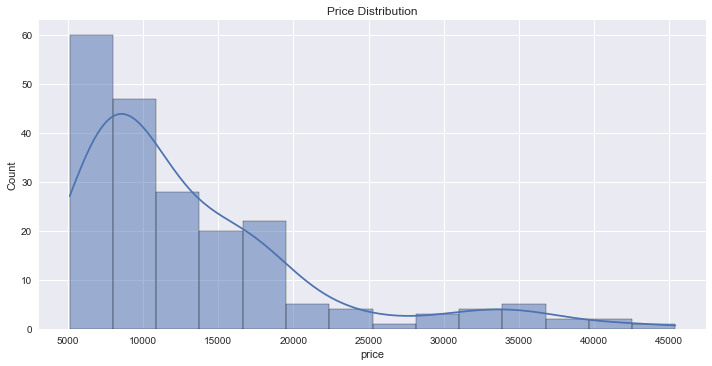

In [10]:
plt.style.use('seaborn')
sns.displot(df.price, kde=True, aspect=2, height=5) #Positive Skewed 
plt.title("Price Distribution")
plt.show()

### From below plot the highest sellings are by Toyota 

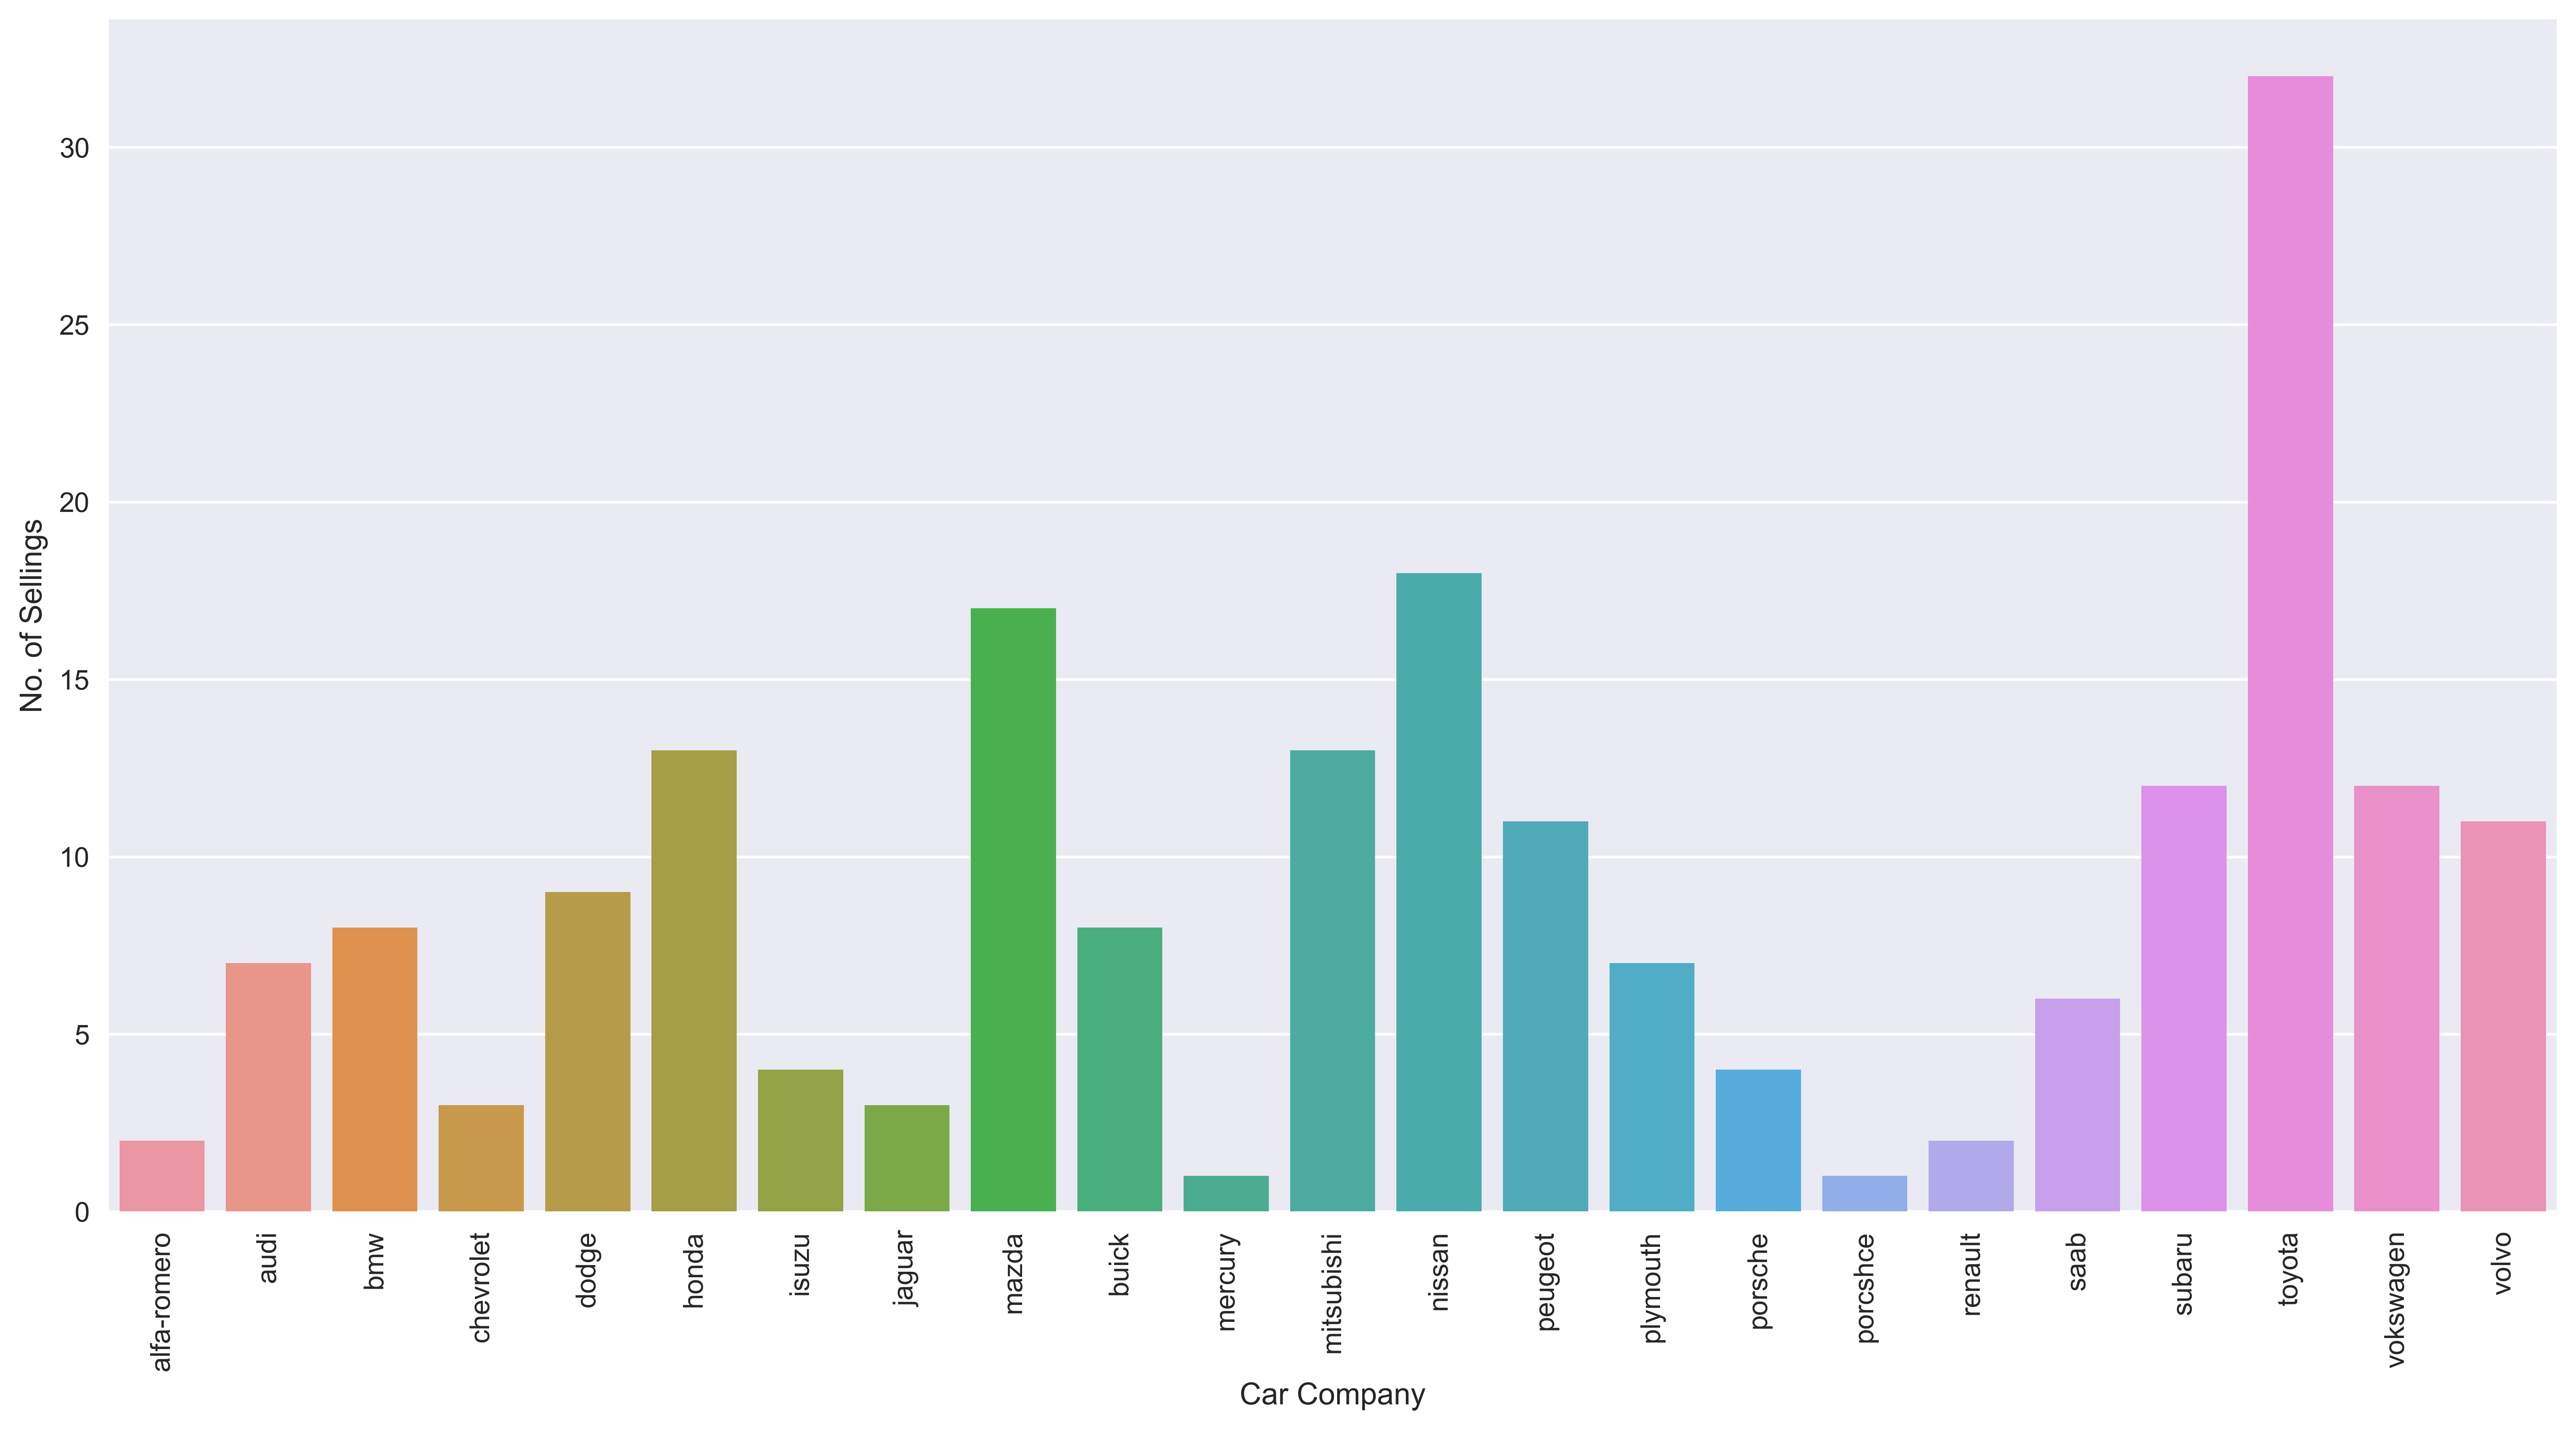

In [11]:
plt.figure(figsize=(16,8),dpi=500)
sns.countplot(data=df,x='CarCompany')
plt.ylabel("No. of Sellings")
plt.xlabel("Car Company")
plt.xticks(rotation=90)
plt.show()

### People are preferreing to buy gas cars not the diesel ones

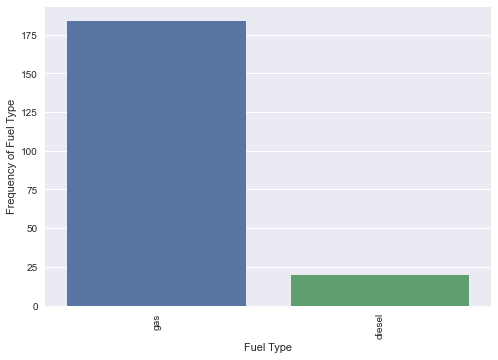

In [12]:
sns.countplot(data=df,x='fueltype')
plt.ylabel("Frequency of Fuel Type")
plt.xlabel("Fuel Type")
plt.xticks(rotation=90)
plt.show()

### The sedan type cars are most bought

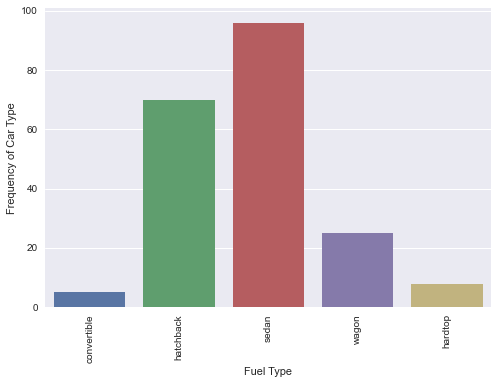

In [13]:
plt.style.use('seaborn')
sns.countplot(data=df, x='carbody')
plt.ylabel("Frequency of Car Type")
plt.xlabel("Fuel Type")
plt.xticks(rotation=90)
plt.show()

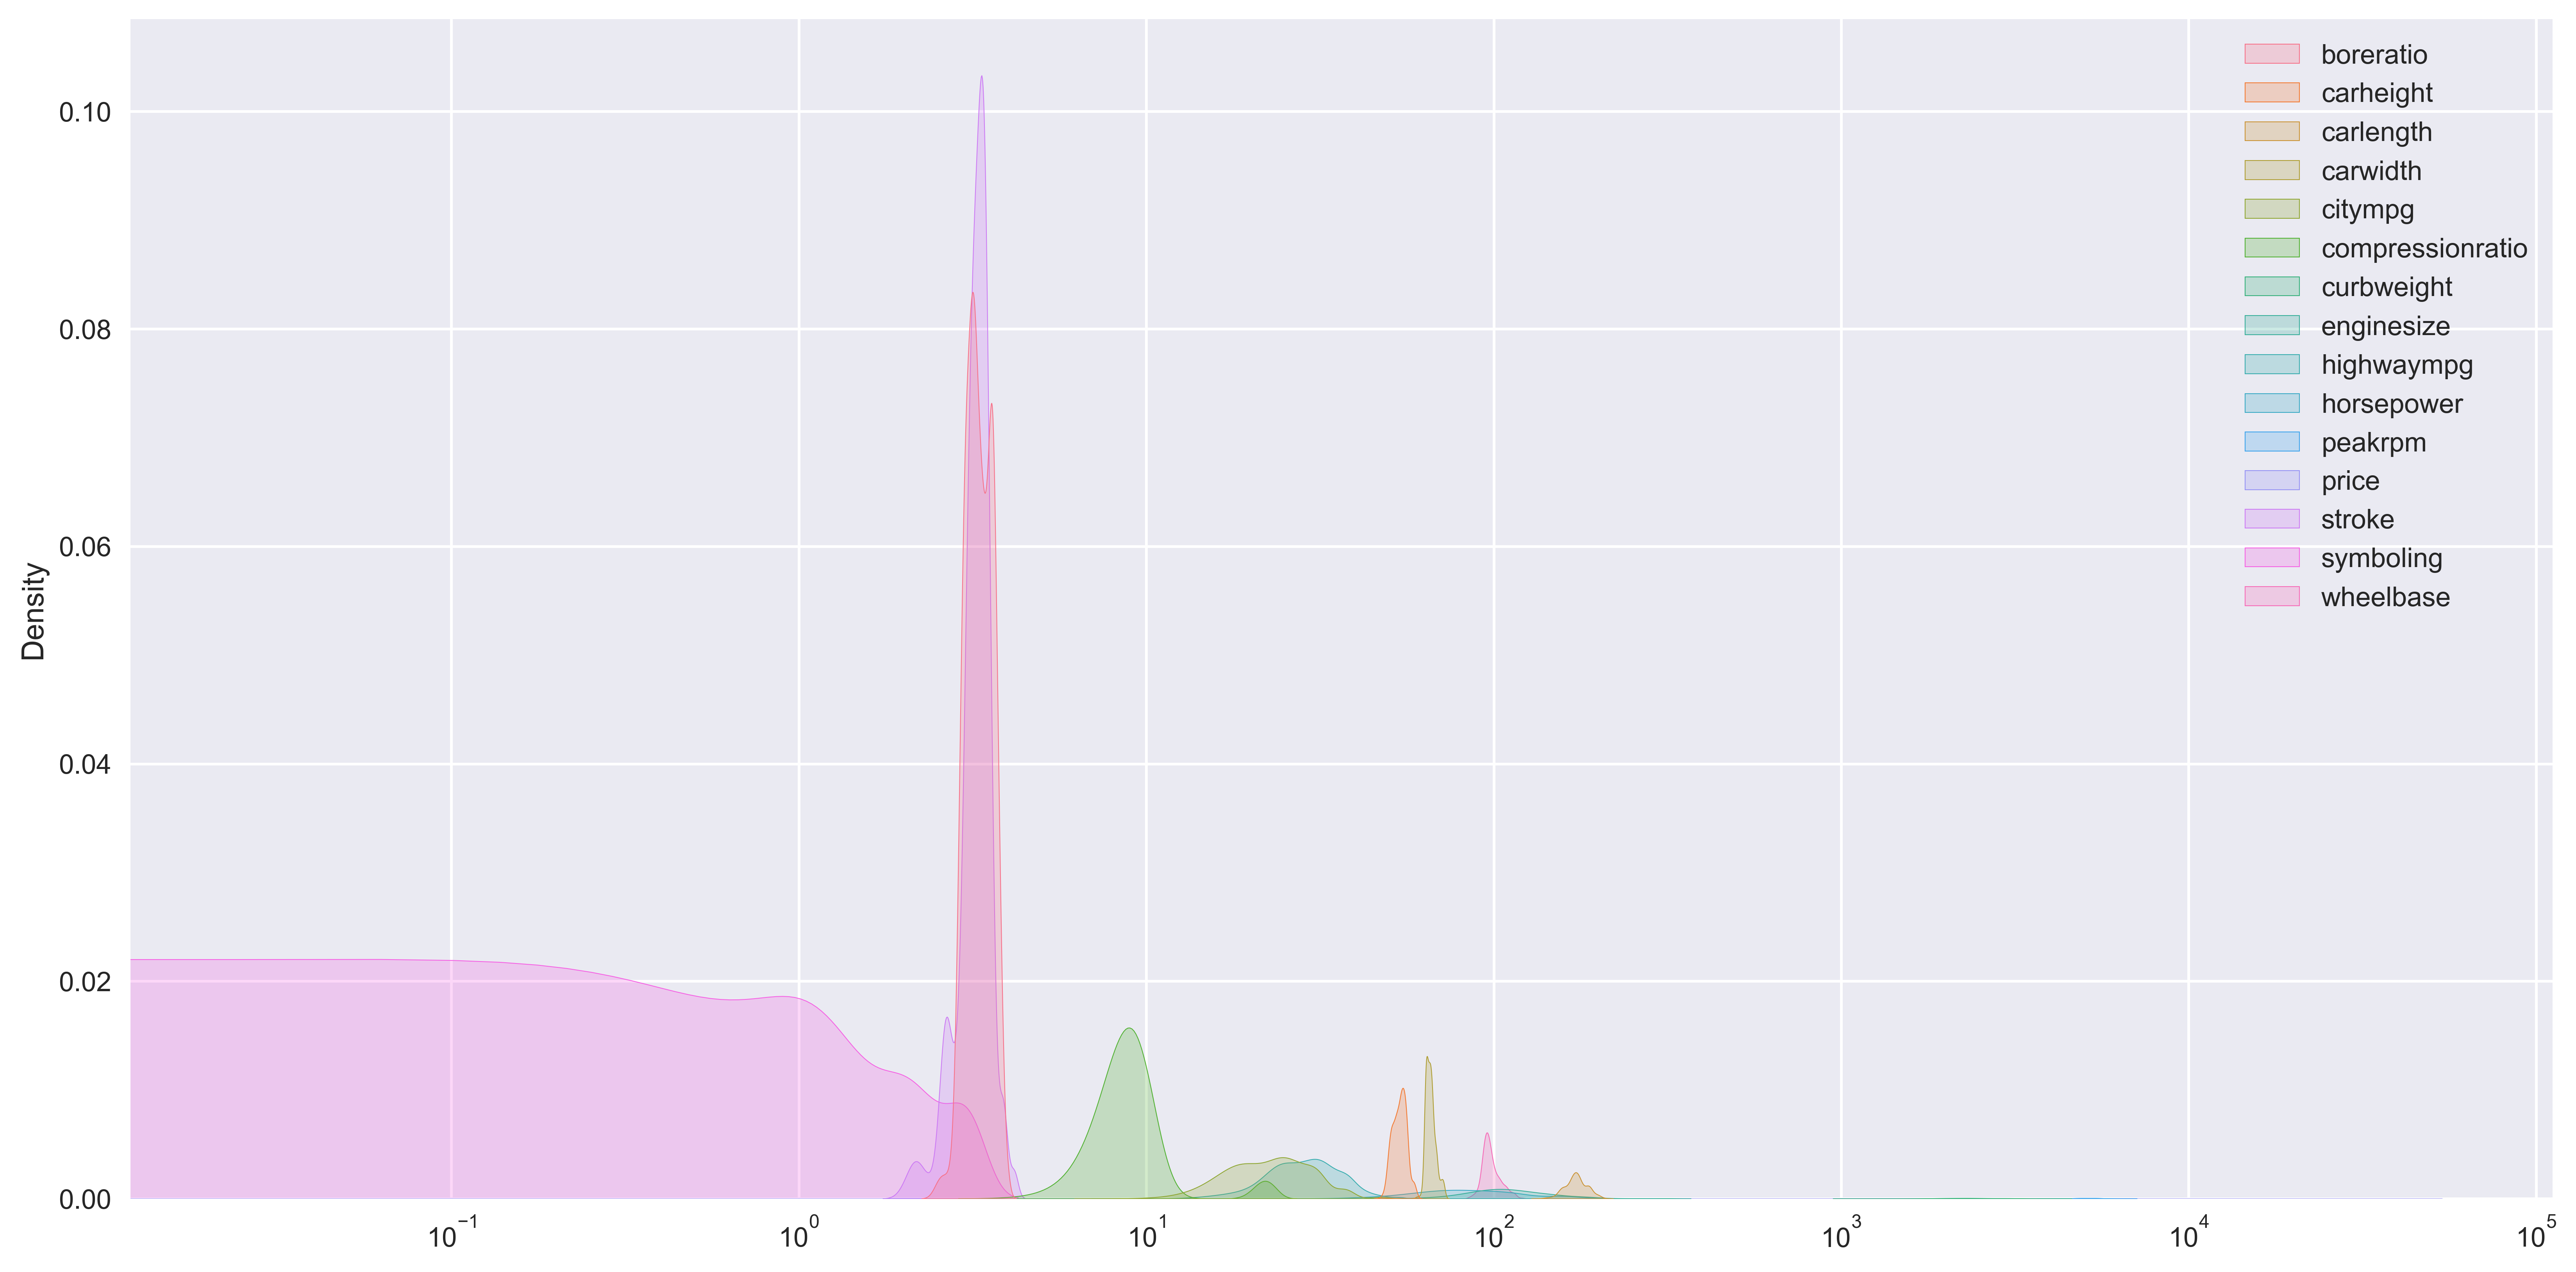

In [14]:
#Checking the density of features (Numeric Values)
plt.style.use('seaborn')
plt.figure(figsize=(16,8),dpi=500)
sns.kdeplot(data=df[df.columns.difference(['car_ID'])], shade=True)
plt.xscale('log')
plt.show()

In [15]:
#Import label encoder for non numeric columns to transform them into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in obj_columns[::-1]:
    df[i] = le.fit_transform(df[i])

In [16]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
2,3,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1
5,6,2,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110,5500,19,25,15250.0,1


In [17]:
df.doornumber = df.doornumber.map({0:2,1:4})#Mapping Door Numbers 0 to 2 and 1 to 4 doors

In [18]:
#Importing MinMaxScaler To Normalize the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [19]:
obj_columns =['car_ID','symboling','CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']

In [20]:
df[df.columns.difference(obj_columns)] = mm.fit_transform(df[df.columns.difference(obj_columns)])

In [21]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,1,0,4,0,2,0,0.058309,0.413433,0.316667,0.083333,0.411171,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959,0.000000
2,3,1,1,0,4,2,2,0,0.230321,0.449254,0.433333,0.383333,0.517843,5,3,0.343396,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558,0.000000
3,4,2,1,0,2,3,1,0,0.384840,0.529851,0.491667,0.541667,0.329325,3,2,0.181132,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254,0.045455
4,5,2,1,0,2,3,0,0,0.373178,0.529851,0.508333,0.541667,0.518231,3,1,0.283019,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142,0.045455
5,6,2,1,0,4,3,1,0,0.384840,0.540299,0.500000,0.441667,0.395268,3,1,0.283019,5,0.464286,0.633333,0.09375,0.258333,0.551020,0.166667,0.236842,0.251527,0.045455


In [22]:
df.drop(columns=['car_ID'], inplace=True)

### There is no null value in data set

# Step3: Splitting Data

In [23]:
#X = Features's Values and y = Target Values
X = df[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']].values

y=df[['price']].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Here I am taking test set as 30% and Train Set will be 70% but later I will divide it in more to get the 20% of validate set

# Step4: Model

In [25]:
model = tf.keras.Sequential()

In [26]:
model.add(tf.keras.layers.Flatten()) #Flatten will change the shape of input and convert it into 1d array
model.add(Dense(10, activation='relu'))
model.add(Dense(8))
model.add(Dense(6))
model.add(Dense(1, activation = 'tanh'))

# Step5: Compilation

In [27]:
model.compile(optimizer='RMSprop',metrics=['mae'], loss = ['mse'])

In [28]:
history = model.fit(X_train, y_train, epochs= 100, validation_split= 0.2) #Here I also split the data 0.2 which will be for validation

Epoch 1/100
4/4 [==============================] - 1s 196ms/step - loss: 1.4249 - mae: 1.1789 - val_loss: 1.3833 - val_mae: 1.1577
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 1.3688 - mae: 1.1304 - val_loss: 1.2028 - val_mae: 1.0331
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 1.2124 - mae: 1.0205 - val_loss: 1.0664 - val_mae: 0.9249
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 1.1312 - mae: 0.9722 - val_loss: 0.9497 - val_mae: 0.8905
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.9276 - mae: 0.8775 - val_loss: 0.6694 - val_mae: 0.7269
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6805 - mae: 0.7351 - val_loss: 0.3928 - val_mae: 0.5593
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3987 - mae: 0.5718 - val_loss: 0.2886 - val_mae: 0.4696
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2822 - mae: 0.4

# Step8: Model Evaluation

In [29]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 997us/step - loss: 0.0193 - mae: 0.1016


[0.01927247829735279, 0.10162048041820526]

# Validation vs Training Comparison

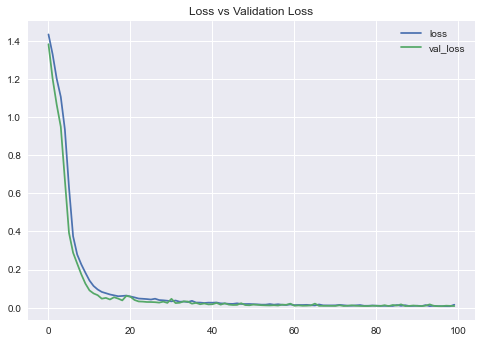

In [30]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss vs Validation Loss")
plt.show()

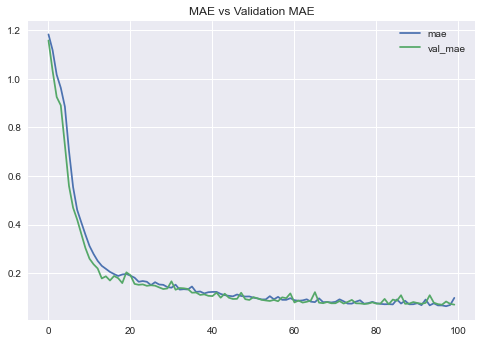

In [31]:
pd.DataFrame(history.history)[['mae','val_mae']].plot()
plt.title("MAE vs Validation MAE")
plt.show()

# Step9: Prediction

In [32]:
y_pred = model.predict(X_test)

## Calculating Error

In [33]:
error = y_test - y_pred #Error

### So the errors are not that much it's good and acceptable performance. This is a close to a neutral skew.

<Figure size 4000x2750 with 0 Axes>

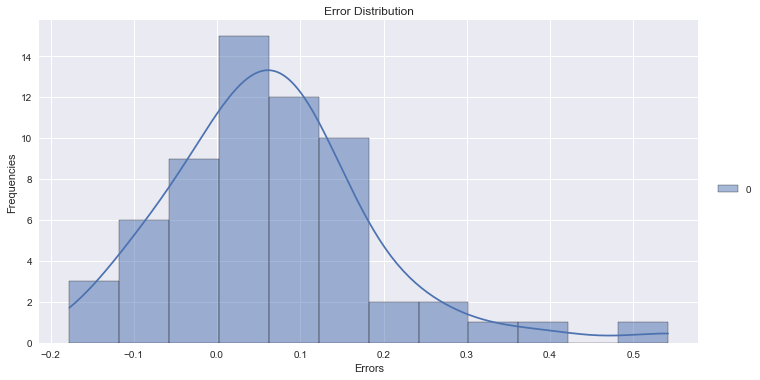

In [34]:
plt.style.use('seaborn')
plt.figure(dpi=500)
sns.displot(error, kde=True, aspect=2, height=5)
plt.title("Error Distribution")
plt.xlabel('Errors')
plt.ylabel("Frequencies")
plt.show()

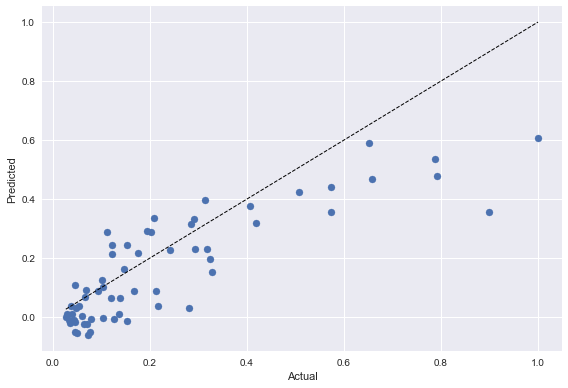

In [35]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 1)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.tight_layout()